# Problem 9 (20 points)

## Problem Description

In this problem you will use `sklearn.svm.SVR` to train a support vector machine for a regression problem. Your model will predict G forces experienced by a sports car as it travels through a chicane in the Nurburgring.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

Results:
- Plot the fitted SVR function for three different epsilon values
- Compute the R2 score for each of the fitted functions

Discussion:
- Discuss the performance of the models and the effect of epsilon

#### Imports and Utility Functions:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

def plot_data(X, y, ax = None):
    if ax is None:
        ax = plt.gca()
        showflag = True
    else:
        showflag = False
    ax.scatter(X,y, c = 'blue')
    ax.set_xlabel('Normalized Position')
    ax.set_ylabel('G Force')
    if showflag:
        plt.show()
    else:
        return ax
    
def plot_svr(model, X, y):
    ax = plt.gca()
    ax = plot_data(X, y, ax)
    xs = np.linspace(min(X), max(X), 1000).reshape(-1,1)
    ys = model.predict(xs)
    ax.plot(xs,ys,'r-')
    plt.legend(['Data', 'Fitted Function'])
    plt.show()


# Load and visualize the data

The data is contained in `nurburgring.npy` and can be loaded with `np.load()`. The first column corresponds to the normalized position of the car in the chicane, and the second column corresponds to the measured G force experienced at that point in the chicane.

Store the data as:
- `X` (Nx1) array of position data
- `y` N-dimensional vector of G force data

Then visualize the data with `plot_data(X,y)`

Note: use X.reshape(-1,1) to make the `X` array two dimensional as required by 'SVR.fit(X,y)'

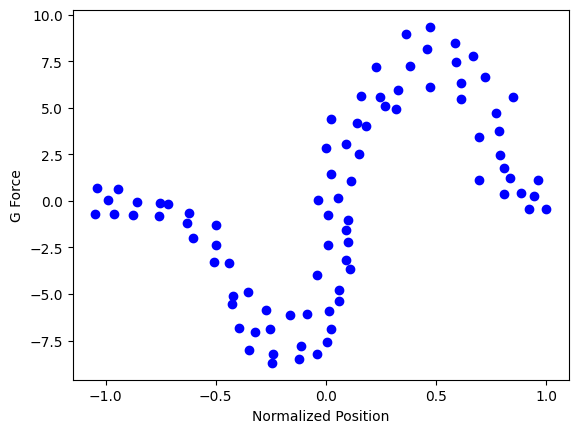

In [6]:
data = np.load("data/nurburgring.npy")
X = data[:,0].reshape(-1,1)
y = data[:,1]

plot_data(X,y)


# Train Support Vector Regressors

Train three different support vector regressors using the RBF Kernel, C = 100, and epsilon = [1, 5, 10]. For each model, report the coefficient of determination ($R^2$) for the fitted model using the builtin sklearn function} `model.score(X,y)`, and plot the fitted function against the data using `plot_svr(model, X, y)`

Model 0 Coefficient of Determination: 0.803896252951426


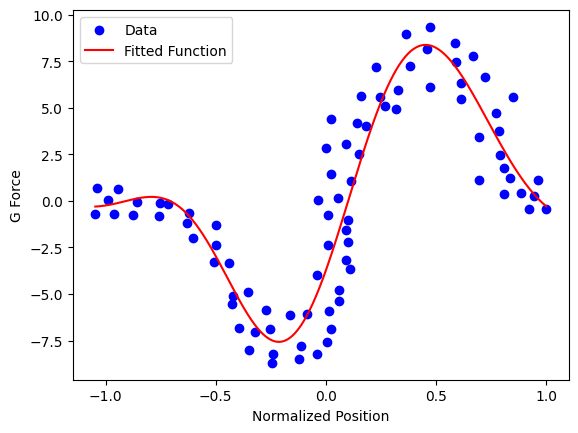

Model 1 Coefficient of Determination: 0.6412302705136446


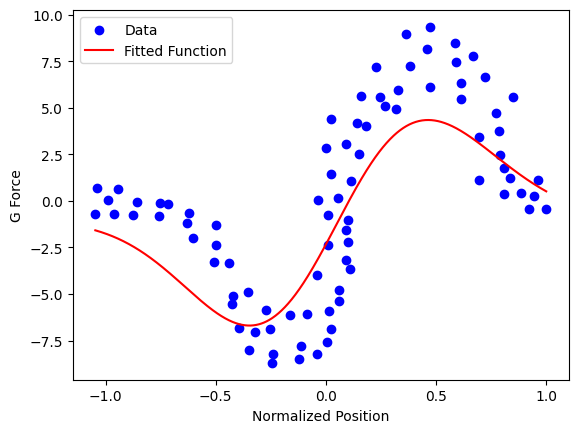

Model 2 Coefficient of Determination: -0.005585141758953638


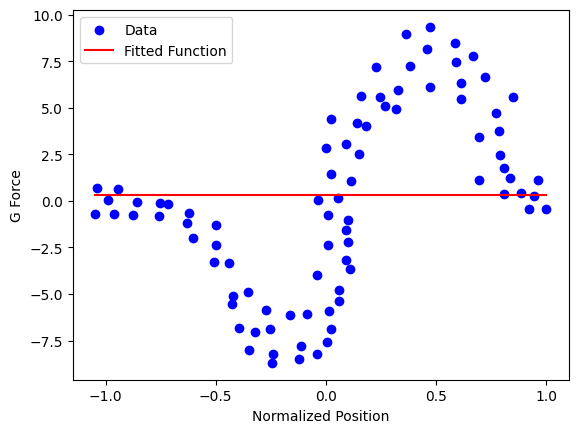

In [7]:
epsilon = [1, 5, 10]
i = 0
for e in epsilon:
    model = SVR(kernel='rbf', C=100, epsilon=e)
    model.fit(X,y)
    R_2 = model.score(X,y)
    print(f"Model {i} Coefficient of Determination: {R_2}")
    plot_svr(model, X, y)
    i += 1


# Discussion

Briefly discuss the performance of the three models, and explain how the value of epsilon influences the fitted model within the context of epsilon insenstive loss introduced in lecture.

The performance of the first model with epsilon = 1 performed the best slowly decreasing in performance as epsilon increased. This is a result of making the allowable slack too large when making the fit. When the allowable slack from the fitted line is greater than the y range divided by 2 as in the case of the 3rd model. the fit will just be a line through the data.